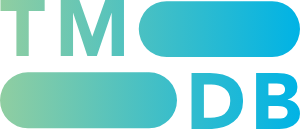

# IMDb Movies: Analysis & Predictions

## Business Problem:
For this project, you have been hired to produce a MySQL database on Movies from a subset of IMDB's publicly available dataset. Ultimately, you will use this database to analyze what makes a movie successful and will provide recommendations to the stakeholder on how to make a successful movie.

### Source:  
#### https://datasets.imdbws.com/ .gz

We will focus on the following data files: <br> 
**title.basics.tsv.gz** <br>
**title.ratings.tsv.gz** <br>
**title.akas.tsv.gz** <br>

### Part 2: Exploratory Data Analysis 
***

In [1]:
import json
import os, time,json
import tmdbsimple as tmdb
import pandas as pd
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['akas.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'ratings.csv.gz',
 'title_basics.csv.gz',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json',
 'tmdb_results_combined.csv.gz']

In [2]:
data_folder = 'Data/'
result_file_name = 'final_tmdb_data_'
combined_output_file = 'tmdb_results_combined'

- ### **Load in your csv.gz's of results for each year extracted**

In [3]:
# Get result files (allows us to call the Get Financial Data notebook for multiple years)
result_files = []
for file in os.listdir(FOLDER):
    if file[0:len(result_file_name)] == result_file_name:
        result_files.append(file)
result_files

['final_tmdb_data_2001.csv.gz', 'final_tmdb_data_2002.csv.gz']

- ### **Concatenate the data into 1 dataframe for the remainder of the analysis**

In [4]:
# Concat all result files into one file
dataframes = []
for file in result_files:
    dataframes.append(pd.read_csv(FOLDER + file))
    
df = pd.concat(dataframes, axis=0)
df.to_csv(f'{FOLDER}{combined_output_file}.csv.gz', compression='gzip', index=False)
print(df.shape)
df.head()

(2670, 26)


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.324,1241.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.156,32.0,R


- ### **Perform some light EDA**

In [5]:
df = pd.read_csv(f'{FOLDER}{combined_output_file}.csv.gz')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.324,1241.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.156,32.0,R


#### 1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
> #### (Please exclude any movies with 0's for budget AND revenue from the remaining visualizations)

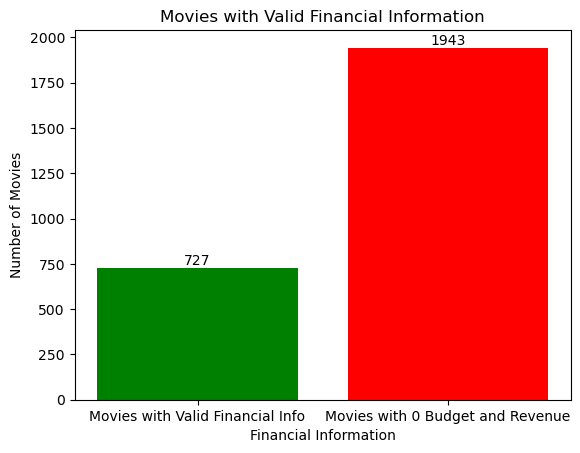

In [6]:
# Only include rows with valid financial information
filtered_movies = df[(df['budget'] > 0) | (df['revenue'] > 0)]

# Count of movies with valid financial information
valid_financial_info_count = len(filtered_movies)

# Count of movies with 0 values for both budget and revenue
invalid_financial_info_count = len(df) - valid_financial_info_count

# Data for visualization
labels = ['Movies with Valid Financial Info', 'Movies with 0 Budget and Revenue']
counts = [valid_financial_info_count, invalid_financial_info_count]

# Create bar chart with annotations
fig, ax = plt.subplots()
bars = ax.bar(labels, counts, color=['green', 'red'])

# Add actual numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval), ha='center', va='bottom')

plt.xlabel('Financial Information')
plt.ylabel('Number of Movies')
plt.title('Movies with Valid Financial Information')
plt.show()

#### 2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?

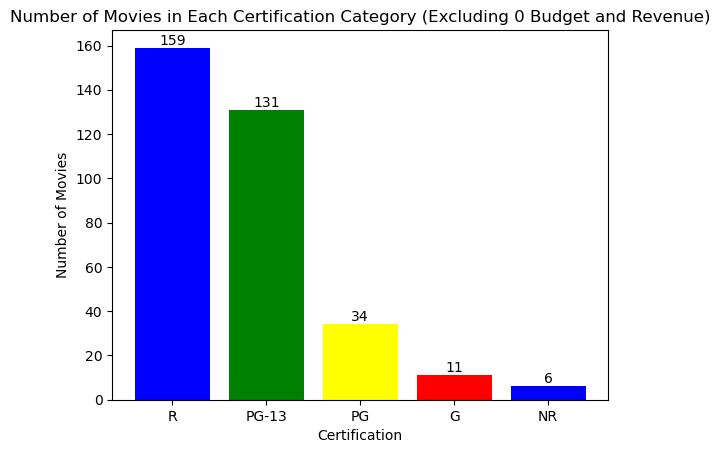

In [7]:
# Filter out movies with 0 values for both budget and revenue
valid_movies = df[(df['budget'] > 0) & (df['revenue'] > 0)]

# Count of movies in each certification category
certification_counts = valid_movies['certification'].value_counts()

# Data for visualization
certifications = certification_counts.index
counts = certification_counts.values

# Create bar chart with annotations
fig, ax = plt.subplots()
bars = ax.bar(certifications, counts, color=['blue', 'green', 'yellow', 'red'])

# Add actual numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval), ha='center', va='bottom')

plt.xlabel('Certification')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Certification Category (Excluding 0 Budget and Revenue)')
plt.show()

#### 3. What is the average revenue per certification category?

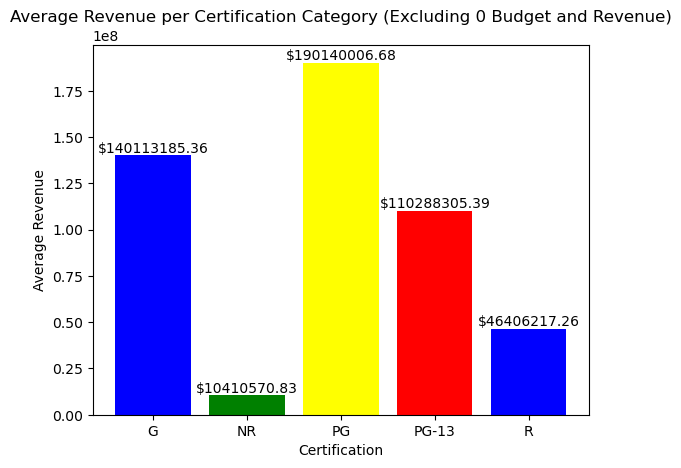

In [8]:
# Filter out movies with 0 values for both budget and revenue
valid_movies = df[(df['budget'] > 0) & (df['revenue'] > 0)]

# Calculate average revenue per certification category
avg_revenue_per_certification = valid_movies.groupby('certification')['revenue'].mean()

# Data for visualization
certifications = avg_revenue_per_certification.index
avg_revenues = avg_revenue_per_certification.values

# Create bar chart with annotations
fig, ax = plt.subplots()
bars = ax.bar(certifications, avg_revenues, color=['blue', 'green', 'yellow', 'red'])

# Add actual average revenue numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"${round(yval, 2)}", ha='center', va='bottom')

plt.xlabel('Certification')
plt.ylabel('Average Revenue')
plt.title('Average Revenue per Certification Category (Excluding 0 Budget and Revenue)')
plt.show()

#### 4. What is the average budget per certification category?

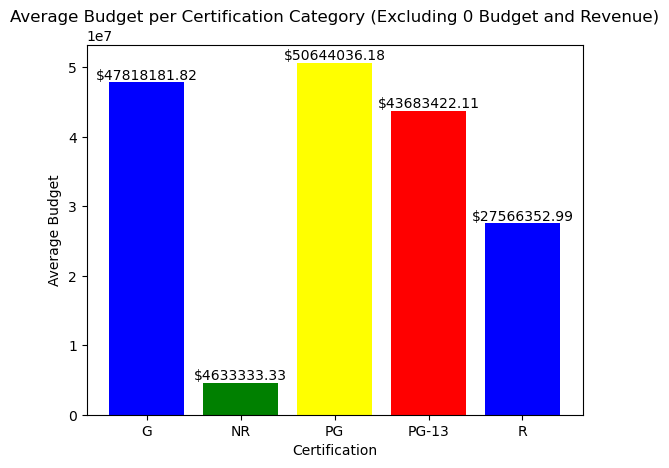

In [9]:
# Filter out movies with 0 values for both budget and revenue
valid_movies = df[(df['budget'] > 0) & (df['revenue'] > 0)]

# Calculate average budget per certification category
avg_budget_per_certification = valid_movies.groupby('certification')['budget'].mean()

# Data for visualization
certifications = avg_budget_per_certification.index
avg_budgets = avg_budget_per_certification.values

# Create bar chart with annotations
fig, ax = plt.subplots()
bars = ax.bar(certifications, avg_budgets, color=['blue', 'green', 'yellow', 'red'])

# Add actual average budget numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"${round(yval, 2)}", ha='center', va='bottom')

plt.xlabel('Certification')
plt.ylabel('Average Budget')
plt.title('Average Budget per Certification Category (Excluding 0 Budget and Revenue)')
plt.show()